In [1]:
from IPython import display

import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf
import tensorflow_probability as tfp
import time

In [2]:
import os
import matplotlib.pyplot as plt
import itertools
import pickle
import imageio
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable

# G(z)
class generator(nn.Module):
    # initializers
    def __init__(self, input_size=32, n_class = 10):
        super(generator, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 1024)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.tanh(self.fc4(x))

        return x

class discriminator(nn.Module):
    # initializers
    def __init__(self, input_size=32, n_class=10):
        super(discriminator, self).__init__()
        self.fc1 = nn.Linear(input_size, 1024)
        self.fc2 = nn.Linear(self.fc1.out_features, 512)
        self.fc3 = nn.Linear(self.fc2.out_features, 256)
        self.fc4 = nn.Linear(self.fc3.out_features, n_class)

    # forward method
    def forward(self, input):
        x = F.leaky_relu(self.fc1(input), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = F.dropout(x, 0.3)
        x = F.sigmoid(self.fc4(x))

        return x

fixed_z_ = torch.randn((5 * 5, 2))    # fixed noise
fixed_z_ = Variable(fixed_z_.cuda(), volatile=True)
def show_result(num_epoch, show = False, save = False, path = 'result.png', isFix=False):
    z_ = torch.randn((5*5, 100))
    z_ = Variable(z_.cuda(), volatile=True)

    G.eval()
    if isFix:
        test_images = G(fixed_z_)
    else:
        test_images = G(z_)
    G.train()

    size_figure_grid = 5
    fig, ax = plt.subplots(size_figure_grid, size_figure_grid, figsize=(5, 5))
    for i, j in itertools.product(range(size_figure_grid), range(size_figure_grid)):
        ax[i, j].get_xaxis().set_visible(False)
        ax[i, j].get_yaxis().set_visible(False)

    for k in range(5*5):
        i = k // 5
        j = k % 5
        ax[i, j].cla()
        ax[i, j].imshow(test_images[k, :].cpu().data.view(28, 28).numpy(), cmap='gray')

    label = 'Epoch {0}'.format(num_epoch)
    fig.text(0.5, 0.04, label, ha='center')
    plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

 

def show_train_hist(hist, show = False, save = False, path = 'Train_hist.png'):
    x = range(len(hist['D_losses']))

    y1 = hist['D_losses']
    y2 = hist['G_losses']

    plt.plot(x, y1, label='D_loss')
    plt.plot(x, y2, label='G_loss')
    plt.plot(x,np.add(y1,y2),label='total_loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
  

    plt.legend()
    plt.grid(True)
    plt.tight_layout()

    if save:
        plt.savefig(path)

    if show:
        plt.show()
    else:
        plt.close()

# training parameters
batch_size = 128
lr = 0.00002
train_epoch = 10

# data_loader
transform = transforms.Compose([
        transforms.ToTensor(),
        transforms.Normalize(mean=(0.5,), std=(0.5,))
])
train_loader = torch.utils.data.DataLoader(
    datasets.MNIST('data', train=True, download=True, transform=transform),
    batch_size=batch_size, shuffle=True)

# network
G = generator(input_size=2, n_class=28*28)
D = discriminator(input_size=28*28, n_class=1)
G.cuda()
D.cuda()

# Binary Cross Entropy loss
BCE_loss = nn.BCELoss()

# Adam optimizer
G_optimizer = optim.Adam(G.parameters(), lr=lr)
D_optimizer = optim.Adam(D.parameters(), lr=lr)

# results save folder
if not os.path.isdir('MNIST_GAN_results'):
    os.mkdir('MNIST_GAN_results')
if not os.path.isdir('MNIST_GAN_results/Random_results'):
    os.mkdir('MNIST_GAN_results/Random_results')
if not os.path.isdir('MNIST_GAN_results/Fixed_results'):
    os.mkdir('MNIST_GAN_results/Fixed_results')



/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:54: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1806: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


[1/10]: loss_d: 0.944, loss_g: 0.878


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:57: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.


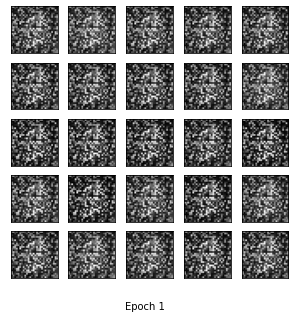

[2/10]: loss_d: 0.896, loss_g: 1.190


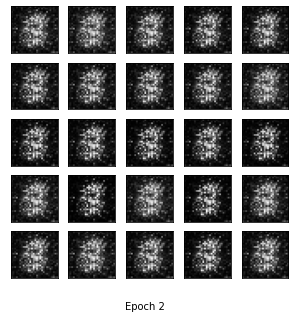

[3/10]: loss_d: 0.619, loss_g: 1.530


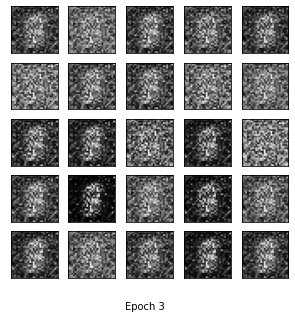

[4/10]: loss_d: 0.435, loss_g: 2.015


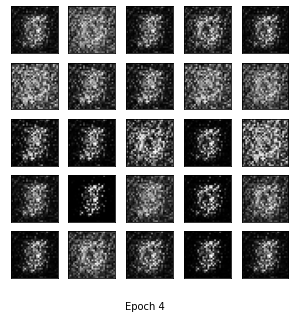

[5/10]: loss_d: 0.315, loss_g: 2.782


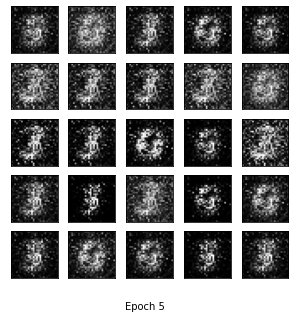

[6/10]: loss_d: 0.238, loss_g: 3.231


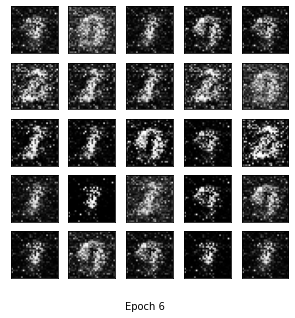

[7/10]: loss_d: 0.158, loss_g: 4.047


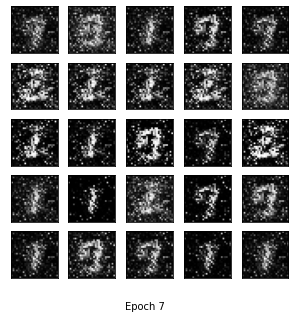

[8/10]: loss_d: 0.134, loss_g: 4.545


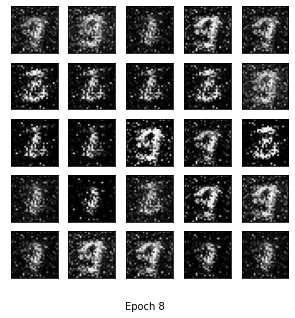

[9/10]: loss_d: 0.125, loss_g: 4.725


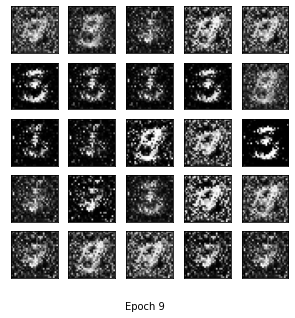

[10/10]: loss_d: 0.129, loss_g: 4.842


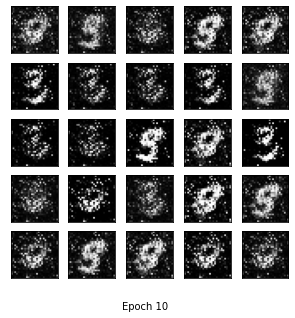

Training finish!... save training results
Training finish!... save training results


In [3]:
train_hist = {}
train_hist['D_losses'] = []
train_hist['G_losses'] = []
for epoch in range(train_epoch):
    D_losses = []
    G_losses = []
    for x_, _ in train_loader:
        # train discriminator D
        D.zero_grad()

        x_ = x_.view(-1, 28 * 28)

        mini_batch = x_.size()[0]

        y_real_ = torch.ones(mini_batch)
        y_fake_ = torch.zeros(mini_batch)

        x_, y_real_, y_fake_ = Variable(x_.cuda()), Variable(y_real_.cuda()), Variable(y_fake_.cuda())
        D_result = D(x_)
        D_real_loss = BCE_loss(D_result.reshape(-1), y_real_)
        D_real_score = D_result

        z_ = torch.randn((mini_batch, 2))
        z_ = Variable(z_.cuda())
        G_result = G(z_)

        D_result = D(G_result)
        D_fake_loss = BCE_loss(D_result.reshape(-1), y_fake_)
        D_fake_score = D_result

        D_train_loss = D_real_loss + D_fake_loss

        D_train_loss.backward()
        D_optimizer.step()

        D_losses.append(D_train_loss.data)

        # train generator G
        G.zero_grad()

        z_ = torch.randn((mini_batch, 2))
        y_ = torch.ones(mini_batch)

        z_, y_ = Variable(z_.cuda()), Variable(y_.cuda())
        G_result = G(z_)
        D_result = D(G_result)
        G_train_loss = BCE_loss(D_result.reshape(-1), y_)
        G_train_loss.backward()
        G_optimizer.step()

        G_losses.append(G_train_loss.data)

    print('[%d/%d]: loss_d: %.3f, loss_g: %.3f' % (
        (epoch + 1), train_epoch, torch.mean(torch.FloatTensor(D_losses)), torch.mean(torch.FloatTensor(G_losses))))
    p = 'MNIST_GAN_results/Random_results/MNIST_GAN_' + str(epoch + 1) + '.png'
    fixed_p = 'MNIST_GAN_results/Fixed_results/MNIST_GAN_' + str(epoch + 1) + '.png'
    fixed_p = 'MNIST_GAN_results/Fixed_results/MNIST_GAN_' + str(epoch + 1) + '.png'
    #show_result((epoch+1), save=True, path=p, isFix=False)
    show_result((epoch+1), show=True, path=fixed_p, isFix=True)
    train_hist['D_losses'].append(torch.mean(torch.FloatTensor(D_losses)))
    train_hist['G_losses'].append(torch.mean(torch.FloatTensor(G_losses)))

print("Training finish!... save training results")
torch.save(G.state_dict(), "MNIST_GAN_results/generator_param.pkl")
torch.save(D.state_dict(), "MNIST_GAN_results/discriminator_param.pkl")
with open('MNIST_GAN_results/train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)

show_train_hist(train_hist, save=True, path='MNIST_GAN_results/MNIST_GAN_train_hist.png')

print("Training finish!... save training results")
torch.save(G.state_dict(), "MNIST_GAN_results/generator_param.pkl")
torch.save(D.state_dict(), "MNIST_GAN_results/discriminator_param.pkl")
with open('MNIST_GAN_results/train_hist.pkl', 'wb') as f:
    pickle.dump(train_hist, f)

show_train_hist(train_hist, save=True, path='MNIST_GAN_results/MNIST_GAN_train_hist.png')

images = []
for e in range(train_epoch):
    img_name = 'MNIST_GAN_results/Fixed_results/MNIST_GAN_' + str(e + 1) + '.png'
    images.append(imageio.imread(img_name))
imageio.mimsave('MNIST_GAN_results/generation_animation.gif', images, fps=5)

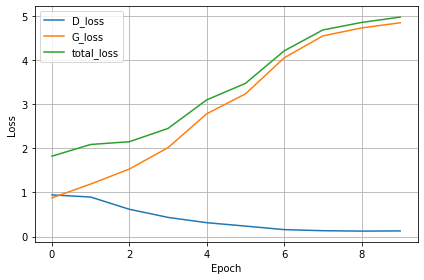

In [9]:
show_train_hist(train_hist, show =True)

In [5]:
!pip install tensorflow-probability

# to generate gifs
!pip install imageio
!pip install git+https://github.com/tensorflow/docs

ERROR: Operation cancelled by user
  Cloning https://github.com/tensorflow/docs to /tmp/pip-req-build-rwitun9r
  Running command git clone -q https://github.com/tensorflow/docs /tmp/pip-req-build-rwitun9r
ERROR: Operation cancelled by user


In [6]:
from scipy.stats import norm
def plot_latent_images(model, n, digit_size=28):
  """Plots n x n digit images decoded from the latent space."""

  
  grid_x = norm.ppf(np.linspace(0.05, 0.95, n))
  grid_y = norm.ppf(np.linspace(0.05, 0.95, n))
  image_width = digit_size*n
  image_height = image_width
  image = np.zeros((image_height, image_width))

  for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
      z=torch.Tensor([[xi,yi]])
      x_decoded = G(z.cuda()).detach().cpu().numpy()
      digit = tf.reshape(x_decoded[0], (digit_size, digit_size))
      image[i * digit_size: (i + 1) * digit_size,
            j * digit_size: (j + 1) * digit_size] = digit.numpy()

  plt.figure(figsize=(10, 10))
  plt.imshow(image, cmap='Greys_r')
  plt.axis('Off')
  plt.show()

/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:1795: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


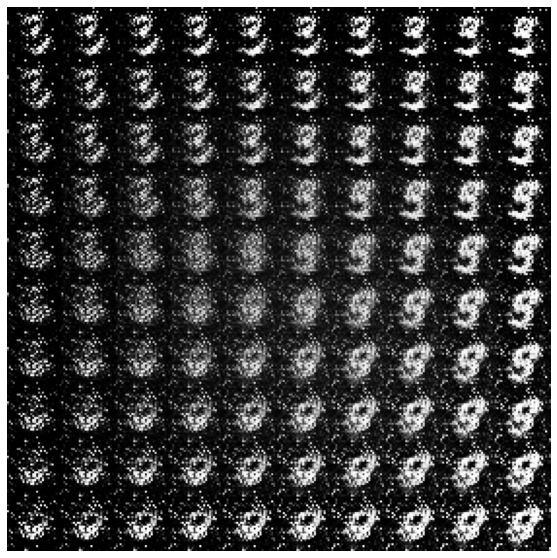

In [8]:
plot_latent_images(G, 10)
